In [4]:
# allow plots to be interactive in the notebook
%matplotlib notebook
# import NextsimBin to load .bin files
from pynextsim.nextsim_bin import NextsimBin
# load netcdf
from netCDF4 import Dataset, num2date, date2index
# load plotting library
import matplotlib.pyplot as plt 
import cmocean as cmo
from glob import glob
from datetime import datetime, timedelta

In [61]:
# open model output

inpath = '/cluster/work/users/rheinlender/breakup2013/outputs/20121115/'
outpath = 'data/'
outpath_plots = 'plots/'

# define time interval to fetch data
tstart=datetime(2013,2,1)
tstop=datetime(2013,2,2)

#get all daily files
fl = sorted(glob(inpath+'field*T000000Z.bin'))


sit=[]
for fn in fl:
    #print(fn)
    
    #get date
    tmp = fn.split('_')[-1].split('T')[0]
    date = datetime.strptime(tmp, "%Y%m%d")
    year = str(date.year)
    if date >= tstart and date <= tstop: 
        print(date)
    
        #get data
        nb = NextsimBin(fn)
        var = nb.get_var('Thickness')
    
        sit += [var]
        
        
        # calculate time average over period tstart to tstop
        #sit_ave=sit
        

2013-02-01 00:00:00
2013-02-02 00:00:00


In [64]:
sit_avg = sum(sit)/len(sit)


ValueError: operands could not be broadcast together with shapes (131258,) (131128,) 

In [3]:
# get ice thickness from cs2smos on neXtSIM mesh elements

obs_inpath='/cluster/projects/nn2993k/sim/data/CS2_SMOS_v2.0/'
file='awi-cs2smos-l4-sithick-cryosat2_smos_merged-rep-nh25km_ease2-20130128_20130203-fv2p0.nc'

fl=obs_inpath+file 
varname='analysis_ice_thickness'
print('Getting file: ', fl)

cs2smos = nb.get_external_data(fl,varname)

Getting file:  /cluster/projects/nn2993k/sim/data/CS2_SMOS_v2.0/awi-cs2smos-l4-sithick-cryosat2_smos_merged-rep-nh25km_ease2-20130128_20130203-fv2p0.nc


NameError: name 'nb' is not defined

In [166]:
# define variables
sit=mooring.variables['sit'][:]
time=mooring.variables['time']
lat=mooring.variables['latitude'][:]
lon=mooring.variables['longitude'][:]

In [186]:
# create dates variable
dates = num2date(time[:], time.units)
first = num2date(time[0],time.units)
print(dates[0].strftime('%Y-%m-%d %H:%M:%S'))
date1=dates[1]


2013-02-01 06:00:00


In [222]:

# specify time interval 
from datetime import datetime
time_format=('%Y-%m-%d %H:%M:%S')

start_dt = datetime(2013,2,15,0,0,0,0);
end_dt = datetime(2013,2,16,0,0,0,0);

istart = date2index(start_dt,time,select='nearest')
istop=date2index(end_dt,time,select='nearest')
print(istart, istop)

28 30


(2, 651, 782)

In [227]:
# Get all time records of variable [vname] at indices [iy,ix]
vname = 'sit'

var = mooring.variables[vname]
print(var)
thick = var[istart:istop,:,:]

# average ice thickness (daily)
thick_ave=thick.mean(axis=0)

thick_ave.shape

<class 'netCDF4._netCDF4.Variable'>
float32 sit(time, x, y)
    standard_name: sea_ice_thickness
    long_name: Sea Ice Thickness
    units: m
    cell_methods: time: mean (interval: 12 hours) area: mean
    _FillValue: -100000000000000.0
unlimited dimensions: time
current shape = (56, 782, 651)
filling on


(782, 651)

<IPython.core.display.Javascript object>


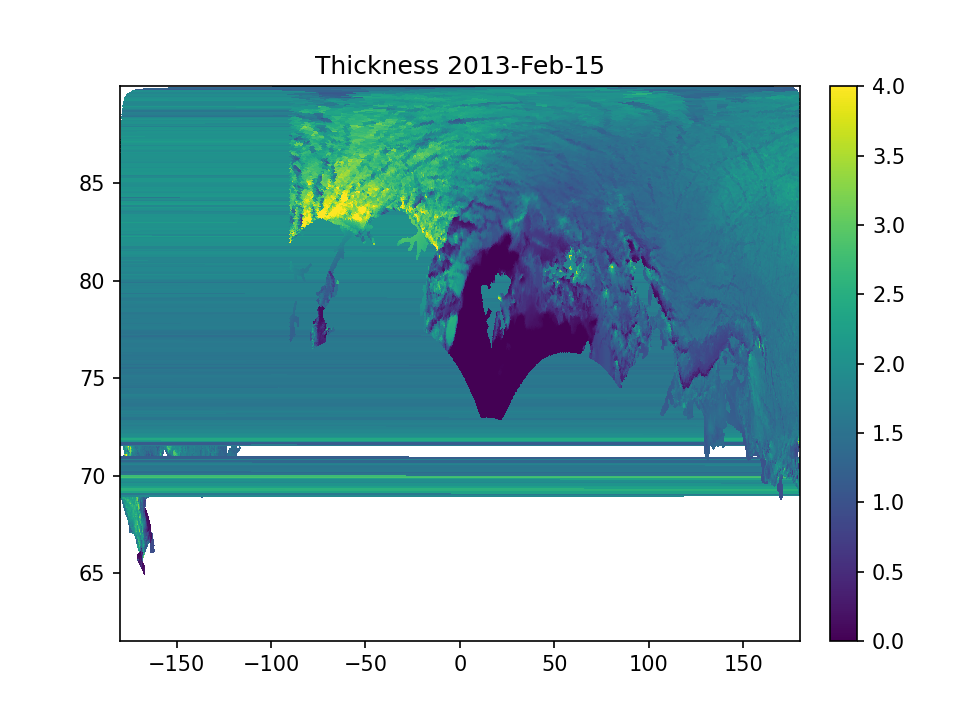

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


In [234]:
# Plot modelled sea ice thickness in mid-winter (2013-Feb-15)

# get time_string for title
time_string=start_dt.strftime('%Y-%b-%d')



fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(thick_ave.transpose(),vmin=0, vmax=4, cmap='viridis', origin='lower')
ax.set_title('Thickness ' + time_string)
cbar = fig.colorbar(im, 


In [92]:
# get initial SIT from cs2smos on neXtSIM mesh elements
t_cs2smos = nb.get_external_data('/cluster/work/users/rheinlender/nextsim_data_dir/cs2_smos_ice_thickness_20121115-fv2p0.nc', 
                                 'analysis_ice_thickness')


reduce grid bbox:  (-2253963.9571312736, 1647814.94883334, -1230268.2065531476, 2019431.335883342)


22

In [63]:
nb.datetime
plt.close('all')

<IPython.core.display.Javascript object>


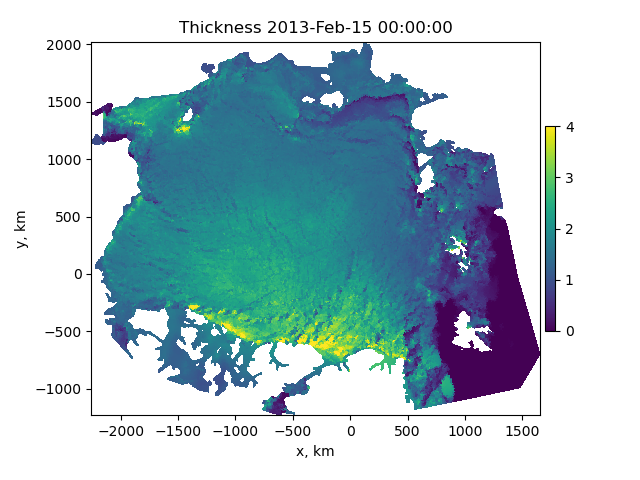

In [205]:
# Plotting initial sea ice thickness and modelled thickness in mid winter (15 Feb) 
plt.close('all')
#out=nb.plot_external_data('/cluster/work/users/rheinlender/nextsim_data_dir/cs2_smos_ice_thickness_20121115-fv2p0.nc', 
#                               'analysis_ice_thickness', cmap='viridis', clim=(0,4))
#pobj.set_title(
nb.plot_var('Thickness', cmap='viridis', clim=(0,4))

#nb.plot_var('Thickness', cmap='viridis')

In [137]:
from pynextsim.file_list import FileList
FileList?

flist=FileList('/cluster/work/users/rheinlender/breakup2013/outputs/20121115/', date1=datetime.datetime(2013, 2, 15, 0, 0),date2=datetime.datetime(2013, 2, 15, 0, 6) )

NameError: name 'datetime' is not defined

<IPython.core.display.Javascript object>


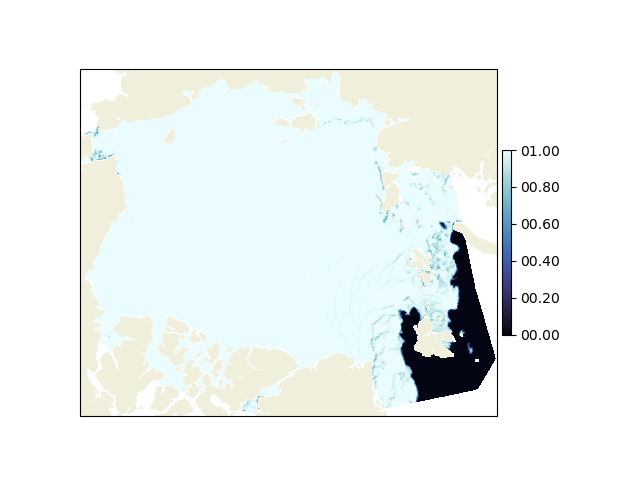

AttributeError: 'method' object has no attribute 'ticks'

In [38]:
# plot SIC on a 2D grid with spatial resolution 2km and neXtSIM projection (polar stereographic)

# set colormap
color_map=cmo.cm.ice
#reversed_color_map = color_map.reversed() 
fig, nb.imshow('Concentration', pixel_size=2000, cmap=color_map, clim=(0,1))
nb.imshow.ticks=[0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]

In [112]:
fig.colorbar

<bound method Figure.colorbar of <Figure size 640x480 with 2 Axes>>